# VGG16

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

Score for fold 1: loss of 0.22241392731666565; accuracy of 0.9777777791023254%
[[181   7]
 [  1 171]]
------------------------------------------------------------------------
Time: 111.2147116000001 Second
------------------------------------------------------------------------
 TN:181,FN:1,TP:171,FP:7
Test of epochs .................................
 Accuracy:0.9777777777777777
 Loss:0.22241392731666565
 Precision:0.9606741573033708
 Recall:0.9941860465116279
 AUC:0.9943457705085612
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                           

Score for fold 2: loss of 0.22041645646095276; accuracy of 0.9583333134651184%
[[159  13]
 [  2 186]]
------------------------------------------------------------------------
Time: 222.93717030000016 Second
------------------------------------------------------------------------
 TN:159,FN:2,TP:186,FP:13
Test of epochs .................................
 Accuracy:0.9583333333333334
 Loss:0.22041645646095276
 Precision:0.9346733668341709
 Recall:0.9893617021276596
 AUC:0.9884696709396061
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                         

Score for fold 3: loss of 0.2123553603887558; accuracy of 0.9722222089767456%
[[178   8]
 [  2 172]]
------------------------------------------------------------------------
Time: 335.6893140000002 Second
------------------------------------------------------------------------
 TN:178,FN:2,TP:172,FP:8
Test of epochs .................................
 Accuracy:0.9722222222222222
 Loss:0.2123553603887558
 Precision:0.9555555555555556
 Recall:0.9885057471264368
 AUC:0.9886973180076628
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                             

Recall of Train ......................................
[0.6089385747909546, 0.7067039012908936, 0.8421787619590759, 0.910614550113678, 0.9050279259681702, 0.9441340565681458, 0.9525139927864075, 0.9608938694000244, 0.9664804339408875, 0.9664804339408875, 0.9748603105545044, 0.9776536226272583, 0.9818435907363892, 0.9818435907363892, 0.9874301552772522, 0.9832402467727661, 0.9832402467727661, 0.9874301552772522, 0.994413435459137, 0.9888268113136292]
AUC of Train ......................................
[0.6264217495918274, 0.8201199173927307, 0.9277474880218506, 0.9639938473701477, 0.977914035320282, 0.9876066446304321, 0.989702582359314, 0.9917126297950745, 0.9935259819030762, 0.9941105246543884, 0.9954608678817749, 0.9955815076828003, 0.9967408180236816, 0.9964976906776428, 0.9969597458839417, 0.9973851442337036, 0.9978722333908081, 0.9978442788124084, 0.9980467557907104, 0.9981789588928223]
Train of epochs .................................
 Accuracy:0.9258333384990692
 Loss:0.34641793

<AxesSubplot:>

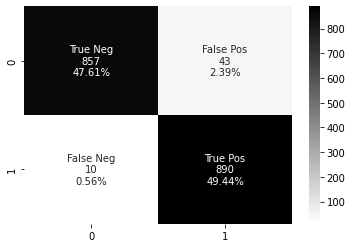

In [2]:
from timeit import default_timer as timer

start = timer()

import seaborn as sns
from time import perf_counter, sleep
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.model_selection import KFold
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.applications import VGG16, VGG19, Xception, ResNet152V2, MobileNetV2
from builtins import range, input
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model, load_model
from tensorflow import keras 
from tensorflow.keras import layers, models, optimizers

# Model configuration
batch_size = 32
no_classes = 2
no_epochs = 20
optimizer = SGD(learning_rate=0.0001)
verbosity = 1
num_folds = 5

#----------------------------------------------------------------------------------------
from PIL import Image
import glob

NEG = glob.glob('C:/Users/Wael Alhazmi/Desktop/Dataset/CT COLONOGRAPHY/Filters - NEG' + '/*.*')
POS = glob.glob('C:/Users/Wael Alhazmi/Desktop/Dataset/CT COLONOGRAPHY/Filters - POS' + '/*.*')


data = []
labels = []

for i in NEG:   
    image=tf.keras.preprocessing.image.load_img(i, 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(0)
for i in POS:   
    image=tf.keras.preprocessing.image.load_img(i, 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(1)


data = np.array(data)
labels = np.array(labels)

from sklearn.model_selection import train_test_split
input_train, input_test, target_train, target_test = train_test_split(data, labels, test_size=0.2, random_state=42)

#----------------------------------------------------------------------------------------




# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

# Define Train_per-fold score containers
Train_acc_per_fold = []
Train_pre_per_fold = []
Train_rec_per_fold = []
Train_AUC_per_fold = []
Train_Loss_per_fold = []


# Define per-fold score containers
acc_per_fold = []
ACC_per_fold = []
loss_per_fold = []
Precision_per_fold = []
Recall_per_fold = []
AUC_per_fold = []

TN = []
FN = []
TP = []
FP = []
TN_SUM = 0
FN_SUM = 0
TP_SUM = 0
FP_SUM = 0


# Merge inputs and targets
inputs = np.concatenate((input_train, input_test), axis=0)
targets = np.concatenate((target_train, target_test), axis=0)




# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

  # Define the model architecture

  





  model = VGG16()
  model_2 = Sequential()
  for layer in model.layers[:-3]:
    model_2.add(layer)

  # Freeze the layers
  for layer in model_2.layers:
    layer.trainable = False

  model_2.add(layers.Dense(4096))
  model_2.add(layers.Dense(4096))
  model_2.add(Dense(1,activation='sigmoid'))
  model_2.summary()



    
    
    
 
  # Compile the model
  model_2.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy','binary_crossentropy',tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall'),
                        tf.keras.metrics.AUC(name='auc')])
  

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model_2.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)

  print(f'Loss of Train ......................................')
  print(history.history['binary_crossentropy'])

  print(f'Accuracy of Train ......................................')
  print(history.history['accuracy'])

  print(f'Precision of Train ......................................')
  print(history.history['precision'])

  print(f'Recall of Train ......................................')
  print(history.history['recall'])

  print(f'AUC of Train ......................................')
  print(history.history['auc'])

  print(f'Train of epochs .................................')
    
  ACC_Train = (np.sum(history.history['accuracy'])/20)
  PRE_Train = (np.sum(history.history['precision'])/20)
  REC_Train = (np.sum(history.history['recall'])/20)
  AUC_Train = (np.sum(history.history['auc'])/20)
  Loss_Train = (np.sum(history.history['binary_crossentropy'])/20)
    
  print(f' Accuracy:{ACC_Train}')
  print(f' Loss:{Loss_Train}')
  print(f' Precision:{PRE_Train}')
  print(f' Recall:{REC_Train}')
  print(f' AUC:{AUC_Train}')
  






  # Generate generalization metrics
  scores = model_2.evaluate(inputs[test], targets[test], verbose=0)

  

    
  print(f'Score for fold {fold_no}: {model_2.metrics_names[0]} of {scores[0]}; {model_2.metrics_names[1]} of {scores[1]}%')
  acc_per_fold.append(scores[1])
  
  loss_per_fold.append(scores[0])
  
  
  import seaborn as sns
  y_pred = model_2.predict(inputs[test])
  y_pred = (y_pred > 0.5)

  #y_pred = model_2.predict(inputs[test])
  cm=confusion_matrix(targets[test],y_pred)
  print(cm)
    
  end = timer()
  print('------------------------------------------------------------------------')
  print(f'Time: {end - start} Second') # Time in seconds, e.g. 5.38091952400282
  print('------------------------------------------------------------------------')

    

  TN = cm[0][0]
  FN = cm[1][0]
  TP = cm[1][1]
  FP = cm[0][1]

  print(f' TN:{TN},FN:{FN},TP:{TP},FP:{FP}')
  TN_SUM += TN
  FN_SUM += FN
  TP_SUM += TP
  FP_SUM += FP

    
  Accuracy = (TP + TN) /(TP + TN + FP + FN)
  Precision = (TP) / (TP + FP)
  Recall = (TP) / (TP + FN)
  AUC = (0.5 * ( (TP / (TP + FN)) + (TN / (TN + FN)) ) )
    
    
  print(f'Test of epochs .................................')
  print(f' Accuracy:{Accuracy}')
  print(f' Loss:{scores[0]}')
  print(f' Precision:{Precision}')
  print(f' Recall:{Recall}')  
  print(f' AUC:{AUC}')


  ACC_per_fold.append(Accuracy)
  Precision_per_fold.append(Precision)
  Recall_per_fold.append(Recall)
  AUC_per_fold.append(AUC)
    
  Train_acc_per_fold.append(ACC_Train)
  Train_pre_per_fold.append(PRE_Train)
  Train_rec_per_fold.append(REC_Train)
  Train_AUC_per_fold.append(AUC_Train)
  Train_Loss_per_fold.append(Loss_Train)





  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    
  print('----------------------------------Train--------------------------------------')
  print(f'> Fold {i+1} - Accuracy: {Train_acc_per_fold[i]} - Loss: {Train_Loss_per_fold[i]}')
  print(f'> Fold {i+1} - Precision: {Train_pre_per_fold[i]}')  
  print(f'> Fold {i+1} - Recall: {Train_rec_per_fold[i]}')
  print(f'> Fold {i+1} - AUC: {Train_AUC_per_fold[i]}')
  print('----------------------------------Test---------------------------------------')
  print(f'> Fold {i+1} - Accuracy: {ACC_per_fold[i]} - Loss: {loss_per_fold[i]}')
  print(f'> Fold {i+1} - Precision: {Precision_per_fold[i]}')
  print(f'> Fold {i+1} - Recall: {Recall_per_fold[i]}')
  print(f'> Fold {i+1} - AUC: {AUC_per_fold[i]}')

    

print('----------------------------------Train--------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(Train_acc_per_fold)} (+- {np.std(Train_acc_per_fold)})')
print(f'> Loss: {np.mean(Train_Loss_per_fold)} (+- {np.std(Train_Loss_per_fold)})')
print(f'> Precision: {np.mean(Train_pre_per_fold)} (+- {np.std(Train_pre_per_fold)})')
print(f'> Recall: {np.mean(Train_rec_per_fold)} (+- {np.std(Train_rec_per_fold)})')
print(f'> AUC: {np.mean(Train_AUC_per_fold)} (+- {np.std(Train_AUC_per_fold)})')
print('----------------------------------Test---------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(ACC_per_fold)} (+- {np.std(ACC_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)} (+- {np.std(loss_per_fold)})')
print(f'> Precision: {np.mean(Precision_per_fold)} (+- {np.std(Precision_per_fold)})')
print(f'> Recall: {np.mean(Recall_per_fold)} (+- {np.std(Recall_per_fold)})')
print(f'> AUC: {np.mean(AUC_per_fold)} (+- {np.std(AUC_per_fold)})')




print('----------------------------------Combined Confusion Matrices--------------------------------------')
print(f'> TN SUM: {TN_SUM} FN SUM: {FN_SUM} TP SUM: {TP_SUM} FP SUM: {FP_SUM}')



# Your Confusion Matrix
cm2 = np.array([[TN_SUM, FP_SUM],
               [FN_SUM, TP_SUM]])

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm2.flatten()/np.sum(cm2)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm2, annot=labels, fmt='', cmap='binary')



# VGG19

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

Score for fold 1: loss of 0.3458716571331024; accuracy of 0.8999999761581421%
[[169  18]
 [ 18 155]]
------------------------------------------------------------------------
Time: 134.2540082 Second
------------------------------------------------------------------------
 TN:169,FN:18,TP:155,FP:18
Test of epochs .................................
 Accuracy:0.9
 Loss:0.3458716571331024
 Precision:0.8959537572254336
 Recall:0.8959537572254336
 AUC:0.8998485363667275
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                

[0.5892634391784668, 0.6701030731201172, 0.7148386836051941, 0.7783641219139099, 0.8077921867370605, 0.8296199440956116, 0.866847813129425, 0.8776595592498779, 0.8854860067367554, 0.8947368264198303, 0.899328887462616, 0.9150943160057068, 0.9135135412216187, 0.931693971157074, 0.9269282817840576, 0.9360544085502625, 0.9398084878921509, 0.9411764740943909, 0.9480874538421631, 0.943989098072052]
Recall of Train ......................................
[0.6465753316879272, 0.7123287916183472, 0.7589040994644165, 0.8082191944122314, 0.8520547747612, 0.8671233057975769, 0.8739725947380066, 0.9041095972061157, 0.9109588861465454, 0.9082191586494446, 0.9178082346916199, 0.9301369786262512, 0.9260274171829224, 0.9342465996742249, 0.9383561611175537, 0.9424657821655273, 0.9410958886146545, 0.9424657821655273, 0.9506849050521851, 0.9465753436088562]
AUC of Train ......................................
[0.6136070489883423, 0.726388156414032, 0.7980445623397827, 0.8625631928443909, 0.9011962413787842

45/45 [==============================] - 7s 130ms/step - loss: 0.7516 - accuracy: 0.4229 - binary_crossentropy: 0.7516 - precision: 0.4051 - recall: 0.3567 - auc: 0.3913
Epoch 2/20
45/45 [==============================] - 6s 130ms/step - loss: 0.6975 - accuracy: 0.5236 - binary_crossentropy: 0.6975 - precision: 0.5176 - recall: 0.5379 - auc: 0.5360
Epoch 3/20
45/45 [==============================] - 6s 131ms/step - loss: 0.6424 - accuracy: 0.6431 - binary_crossentropy: 0.6424 - precision: 0.6478 - recall: 0.6096 - auc: 0.7075
Epoch 4/20
45/45 [==============================] - 6s 132ms/step - loss: 0.6025 - accuracy: 0.7444 - binary_crossentropy: 0.6025 - precision: 0.7552 - recall: 0.7149 - auc: 0.8292
Epoch 5/20
45/45 [==============================] - 6s 132ms/step - loss: 0.5628 - accuracy: 0.8069 - binary_crossentropy: 0.5628 - precision: 0.8006 - recall: 0.8118 - auc: 0.8969
Epoch 6/20
45/45 [==============================] - 6s 131ms/step - loss: 0.5308 - accuracy: 0.8556 - bina

 block4_conv1 (Conv2D)       (None, 28, 28, 512)       1180160   
                                                                 
 block4_conv2 (Conv2D)       (None, 28, 28, 512)       2359808   
                                                                 
 block4_conv3 (Conv2D)       (None, 28, 28, 512)       2359808   
                                                                 
 block4_conv4 (Conv2D)       (None, 28, 28, 512)       2359808   
                                                                 
 block4_pool (MaxPooling2D)  (None, 14, 14, 512)       0         
                                                                 
 block5_conv1 (Conv2D)       (None, 14, 14, 512)       2359808   
                                                                 
 block5_conv2 (Conv2D)       (None, 14, 14, 512)       2359808   
                                                                 
 block5_conv3 (Conv2D)       (None, 14, 14, 512)       2359808   
          

Score for fold 5: loss of 0.30728572607040405; accuracy of 0.9472222328186035%
[[173   4]
 [ 15 168]]
------------------------------------------------------------------------
Time: 640.3517654000001 Second
------------------------------------------------------------------------
 TN:173,FN:15,TP:168,FP:4
Test of epochs .................................
 Accuracy:0.9472222222222222
 Loss:0.30728572607040405
 Precision:0.9767441860465116
 Recall:0.9180327868852459
 AUC:0.9191227764213463
------------------------------------------------------------------------
Score per fold
----------------------------------Train--------------------------------------
> Fold 1 - Accuracy: 0.8432638943195343 - Loss: 0.45283899903297425
> Fold 1 - Precision: 0.8383555024862289
> Fold 1 - Recall: 0.8566712498664856
> Fold 1 - AUC: 0.9064273923635483
----------------------------------Test---------------------------------------
> Fold 1 - Accuracy: 0.9 - Loss: 0.3458716571331024
> Fold 1 - Precision: 0.89595375

<AxesSubplot:>

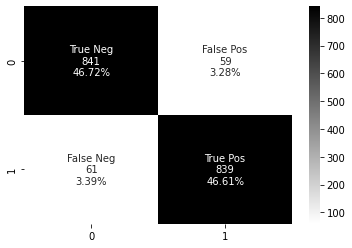

In [1]:
from timeit import default_timer as timer

start = timer()

import seaborn as sns
from time import perf_counter, sleep
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.model_selection import KFold
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.applications import VGG16, VGG19, Xception, ResNet152V2, MobileNetV2
from builtins import range, input
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model, load_model
from tensorflow import keras 
from tensorflow.keras import layers, models, optimizers

# Model configuration
batch_size = 32
no_classes = 2
no_epochs = 20
optimizer = SGD(learning_rate=0.0001)
verbosity = 1
num_folds = 5

#----------------------------------------------------------------------------------------
from PIL import Image
import glob

NEG = glob.glob('C:/Users/Wael Alhazmi/Desktop/Dataset/CT COLONOGRAPHY/Filters - NEG' + '/*.*')
POS = glob.glob('C:/Users/Wael Alhazmi/Desktop/Dataset/CT COLONOGRAPHY/Filters - POS' + '/*.*')


data = []
labels = []

for i in NEG:   
    image=tf.keras.preprocessing.image.load_img(i, 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(0)
for i in POS:   
    image=tf.keras.preprocessing.image.load_img(i, 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(1)


data = np.array(data)
labels = np.array(labels)

from sklearn.model_selection import train_test_split
input_train, input_test, target_train, target_test = train_test_split(data, labels, test_size=0.2, random_state=42)

#----------------------------------------------------------------------------------------




# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

# Define Train_per-fold score containers
Train_acc_per_fold = []
Train_pre_per_fold = []
Train_rec_per_fold = []
Train_AUC_per_fold = []
Train_Loss_per_fold = []


# Define per-fold score containers
acc_per_fold = []
ACC_per_fold = []
loss_per_fold = []
Precision_per_fold = []
Recall_per_fold = []
AUC_per_fold = []

TN = []
FN = []
TP = []
FP = []
TN_SUM = 0
FN_SUM = 0
TP_SUM = 0
FP_SUM = 0


# Merge inputs and targets
inputs = np.concatenate((input_train, input_test), axis=0)
targets = np.concatenate((target_train, target_test), axis=0)




# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

  # Define the model architecture

  





  model = VGG19()
  model_2 = Sequential()
  for layer in model.layers[:-3]:
    model_2.add(layer)

  # Freeze the layers
  for layer in model_2.layers:
    layer.trainable = False

  model_2.add(layers.Dense(4096))
  model_2.add(layers.Dense(4096))
  model_2.add(Dense(1,activation='sigmoid'))
  model_2.summary()



    
    
    
 
  # Compile the model
  model_2.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy','binary_crossentropy',tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall'),
                        tf.keras.metrics.AUC(name='auc')])
  

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model_2.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)

  print(f'Loss of Train ......................................')
  print(history.history['binary_crossentropy'])

  print(f'Accuracy of Train ......................................')
  print(history.history['accuracy'])

  print(f'Precision of Train ......................................')
  print(history.history['precision'])

  print(f'Recall of Train ......................................')
  print(history.history['recall'])

  print(f'AUC of Train ......................................')
  print(history.history['auc'])

  print(f'Train of epochs .................................')
    
  ACC_Train = (np.sum(history.history['accuracy'])/20)
  PRE_Train = (np.sum(history.history['precision'])/20)
  REC_Train = (np.sum(history.history['recall'])/20)
  AUC_Train = (np.sum(history.history['auc'])/20)
  Loss_Train = (np.sum(history.history['binary_crossentropy'])/20)
    
  print(f' Accuracy:{ACC_Train}')
  print(f' Loss:{Loss_Train}')
  print(f' Precision:{PRE_Train}')
  print(f' Recall:{REC_Train}')
  print(f' AUC:{AUC_Train}')
  






  # Generate generalization metrics
  scores = model_2.evaluate(inputs[test], targets[test], verbose=0)

  

    
  print(f'Score for fold {fold_no}: {model_2.metrics_names[0]} of {scores[0]}; {model_2.metrics_names[1]} of {scores[1]}%')
  acc_per_fold.append(scores[1])
  
  loss_per_fold.append(scores[0])
  
  
  import seaborn as sns
  y_pred = model_2.predict(inputs[test])
  y_pred = (y_pred > 0.5)

  #y_pred = model_2.predict(inputs[test])
  cm=confusion_matrix(targets[test],y_pred)
  print(cm)
    
  end = timer()
  print('------------------------------------------------------------------------')
  print(f'Time: {end - start} Second') # Time in seconds, e.g. 5.38091952400282
  print('------------------------------------------------------------------------')

    

  TN = cm[0][0]
  FN = cm[1][0]
  TP = cm[1][1]
  FP = cm[0][1]

  print(f' TN:{TN},FN:{FN},TP:{TP},FP:{FP}')
  TN_SUM += TN
  FN_SUM += FN
  TP_SUM += TP
  FP_SUM += FP

    
  Accuracy = (TP + TN) /(TP + TN + FP + FN)
  Precision = (TP) / (TP + FP)
  Recall = (TP) / (TP + FN)
  AUC = (0.5 * ( (TP / (TP + FN)) + (TN / (TN + FN)) ) )
    
    
  print(f'Test of epochs .................................')
  print(f' Accuracy:{Accuracy}')
  print(f' Loss:{scores[0]}')
  print(f' Precision:{Precision}')
  print(f' Recall:{Recall}')  
  print(f' AUC:{AUC}')


  ACC_per_fold.append(Accuracy)
  Precision_per_fold.append(Precision)
  Recall_per_fold.append(Recall)
  AUC_per_fold.append(AUC)
    
  Train_acc_per_fold.append(ACC_Train)
  Train_pre_per_fold.append(PRE_Train)
  Train_rec_per_fold.append(REC_Train)
  Train_AUC_per_fold.append(AUC_Train)
  Train_Loss_per_fold.append(Loss_Train)





  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    
  print('----------------------------------Train--------------------------------------')
  print(f'> Fold {i+1} - Accuracy: {Train_acc_per_fold[i]} - Loss: {Train_Loss_per_fold[i]}')
  print(f'> Fold {i+1} - Precision: {Train_pre_per_fold[i]}')  
  print(f'> Fold {i+1} - Recall: {Train_rec_per_fold[i]}')
  print(f'> Fold {i+1} - AUC: {Train_AUC_per_fold[i]}')
  print('----------------------------------Test---------------------------------------')
  print(f'> Fold {i+1} - Accuracy: {ACC_per_fold[i]} - Loss: {loss_per_fold[i]}')
  print(f'> Fold {i+1} - Precision: {Precision_per_fold[i]}')
  print(f'> Fold {i+1} - Recall: {Recall_per_fold[i]}')
  print(f'> Fold {i+1} - AUC: {AUC_per_fold[i]}')

    

print('----------------------------------Train--------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(Train_acc_per_fold)} (+- {np.std(Train_acc_per_fold)})')
print(f'> Loss: {np.mean(Train_Loss_per_fold)} (+- {np.std(Train_Loss_per_fold)})')
print(f'> Precision: {np.mean(Train_pre_per_fold)} (+- {np.std(Train_pre_per_fold)})')
print(f'> Recall: {np.mean(Train_rec_per_fold)} (+- {np.std(Train_rec_per_fold)})')
print(f'> AUC: {np.mean(Train_AUC_per_fold)} (+- {np.std(Train_AUC_per_fold)})')
print('----------------------------------Test---------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(ACC_per_fold)} (+- {np.std(ACC_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)} (+- {np.std(loss_per_fold)})')
print(f'> Precision: {np.mean(Precision_per_fold)} (+- {np.std(Precision_per_fold)})')
print(f'> Recall: {np.mean(Recall_per_fold)} (+- {np.std(Recall_per_fold)})')
print(f'> AUC: {np.mean(AUC_per_fold)} (+- {np.std(AUC_per_fold)})')




print('----------------------------------Combined Confusion Matrices--------------------------------------')
print(f'> TN SUM: {TN_SUM} FN SUM: {FN_SUM} TP SUM: {TP_SUM} FP SUM: {FP_SUM}')



# Your Confusion Matrix
cm2 = np.array([[TN_SUM, FP_SUM],
               [FN_SUM, TP_SUM]])

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm2.flatten()/np.sum(cm2)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm2, annot=labels, fmt='', cmap='binary')



# ResNet152V2

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 7, 7, 2048)        58331648  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1)                 2049      
                                                                 
Total params: 58,333,697
Trainable params: 58,189,953
Non-trainable params: 143,744
_________________________________________________________________
------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/20
45/45 [==============================] - 33s 417ms/step - loss: 0.7097 - accuracy: 0.5250 - binary_crossentropy: 0.7097 - precis

                                                                 
Total params: 58,333,697
Trainable params: 58,189,953
Non-trainable params: 143,744
_________________________________________________________________
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/20
45/45 [==============================] - 28s 436ms/step - loss: 0.6670 - accuracy: 0.5861 - binary_crossentropy: 0.6670 - precision: 0.6085 - recall: 0.4798 - auc: 0.6337
Epoch 2/20
45/45 [==============================] - 20s 436ms/step - loss: 0.6308 - accuracy: 0.6604 - binary_crossentropy: 0.6308 - precision: 0.6962 - recall: 0.5675 - auc: 0.7176
Epoch 3/20
45/45 [==============================] - 21s 464ms/step - loss: 0.5955 - accuracy: 0.7153 - binary_crossentropy: 0.5955 - precision: 0.7373 - recall: 0.6676 - auc: 0.7806
Epoch 4/20
45/45 [==============================] - 20s 450ms/step - loss: 0.5637 - accuracy: 0.7549 - binary_crossentropy: 0.5637 - precisio

45/45 [==============================] - 20s 438ms/step - loss: 0.5142 - accuracy: 0.8292 - binary_crossentropy: 0.5142 - precision: 0.8538 - recall: 0.7861 - auc: 0.9009
Epoch 6/20
45/45 [==============================] - 20s 438ms/step - loss: 0.4882 - accuracy: 0.8465 - binary_crossentropy: 0.4882 - precision: 0.8725 - recall: 0.8045 - auc: 0.9257
Epoch 7/20
45/45 [==============================] - 20s 441ms/step - loss: 0.4646 - accuracy: 0.8729 - binary_crossentropy: 0.4646 - precision: 0.8897 - recall: 0.8456 - auc: 0.9409
Epoch 8/20
45/45 [==============================] - 19s 432ms/step - loss: 0.4377 - accuracy: 0.8993 - binary_crossentropy: 0.4377 - precision: 0.9107 - recall: 0.8810 - auc: 0.9615
Epoch 9/20
45/45 [==============================] - 20s 448ms/step - loss: 0.4154 - accuracy: 0.9076 - binary_crossentropy: 0.4154 - precision: 0.9146 - recall: 0.8952 - auc: 0.9737
Epoch 10/20
45/45 [==============================] - 20s 447ms/step - loss: 0.4005 - accuracy: 0.9174

<AxesSubplot:>

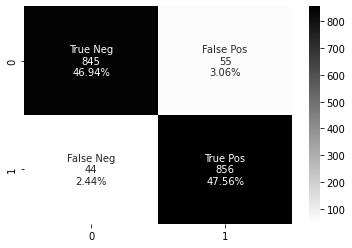

In [1]:
from timeit import default_timer as timer

start = timer()

import seaborn as sns
from time import perf_counter, sleep
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.model_selection import KFold
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.applications import VGG16, VGG19, Xception, ResNet152V2, MobileNetV2
from builtins import range, input
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model, load_model
from tensorflow import keras 
from tensorflow.keras import layers, models, optimizers

# Model configuration
batch_size = 32
no_classes = 2
no_epochs = 20
optimizer = SGD(learning_rate=0.0001)
verbosity = 1
num_folds = 5

#----------------------------------------------------------------------------------------
from PIL import Image
import glob

NEG = glob.glob('C:/Users/Wael Alhazmi/Desktop/Dataset/CT COLONOGRAPHY/Filters - NEG' + '/*.*')
POS = glob.glob('C:/Users/Wael Alhazmi/Desktop/Dataset/CT COLONOGRAPHY/Filters - POS' + '/*.*')


data = []
labels = []

for i in NEG:   
    image=tf.keras.preprocessing.image.load_img(i, 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(0)
for i in POS:   
    image=tf.keras.preprocessing.image.load_img(i, 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(1)


data = np.array(data)
labels = np.array(labels)

from sklearn.model_selection import train_test_split
input_train, input_test, target_train, target_test = train_test_split(data, labels, test_size=0.2, random_state=42)

#----------------------------------------------------------------------------------------




# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

# Define Train_per-fold score containers
Train_acc_per_fold = []
Train_pre_per_fold = []
Train_rec_per_fold = []
Train_AUC_per_fold = []
Train_Loss_per_fold = []


# Define per-fold score containers
acc_per_fold = []
ACC_per_fold = []
loss_per_fold = []
Precision_per_fold = []
Recall_per_fold = []
AUC_per_fold = []

TN = []
FN = []
TP = []
FP = []
TN_SUM = 0
FN_SUM = 0
TP_SUM = 0
FP_SUM = 0


# Merge inputs and targets
inputs = np.concatenate((input_train, input_test), axis=0)
targets = np.concatenate((target_train, target_test), axis=0)




# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

  # Define the model architecture


  def create_model():
      model = models.Sequential()
      model.add(ResNet152V2(include_top=False, weights='imagenet', input_shape=(224, 224, 3)))
      model.add(layers.GlobalAveragePooling2D())
      model.add(layers.Dense(1, activation='sigmoid'))
    
      return model


  model_2 = create_model()
  model_2.summary()
    
 
  # Compile the model
  model_2.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy','binary_crossentropy',tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall'),
                        tf.keras.metrics.AUC(name='auc')])
  

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model_2.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)

  print(f'Loss of Train ......................................')
  print(history.history['binary_crossentropy'])

  print(f'Accuracy of Train ......................................')
  print(history.history['accuracy'])

  print(f'Precision of Train ......................................')
  print(history.history['precision'])

  print(f'Recall of Train ......................................')
  print(history.history['recall'])

  print(f'AUC of Train ......................................')
  print(history.history['auc'])

  print(f'Train of epochs .................................')
    
  ACC_Train = (np.sum(history.history['accuracy'])/20)
  PRE_Train = (np.sum(history.history['precision'])/20)
  REC_Train = (np.sum(history.history['recall'])/20)
  AUC_Train = (np.sum(history.history['auc'])/20)
  Loss_Train = (np.sum(history.history['binary_crossentropy'])/20)
    
  print(f' Accuracy:{ACC_Train}')
  print(f' Loss:{Loss_Train}')
  print(f' Precision:{PRE_Train}')
  print(f' Recall:{REC_Train}')
  print(f' AUC:{AUC_Train}')
  






  # Generate generalization metrics
  scores = model_2.evaluate(inputs[test], targets[test], verbose=0)

  

    
  print(f'Score for fold {fold_no}: {model_2.metrics_names[0]} of {scores[0]}; {model_2.metrics_names[1]} of {scores[1]}%')
  acc_per_fold.append(scores[1])
  
  loss_per_fold.append(scores[0])
  
  
  import seaborn as sns
  y_pred = model_2.predict(inputs[test])
  y_pred = (y_pred > 0.5)

  #y_pred = model_2.predict(inputs[test])
  cm=confusion_matrix(targets[test],y_pred)
  print(cm)
    
  end = timer()
  print('------------------------------------------------------------------------')
  print(f'Time: {end - start} Second') # Time in seconds, e.g. 5.38091952400282
  print('------------------------------------------------------------------------')

    

  TN = cm[0][0]
  FN = cm[1][0]
  TP = cm[1][1]
  FP = cm[0][1]

  print(f' TN:{TN},FN:{FN},TP:{TP},FP:{FP}')
  TN_SUM += TN
  FN_SUM += FN
  TP_SUM += TP
  FP_SUM += FP

    
  Accuracy = (TP + TN) /(TP + TN + FP + FN)
  Precision = (TP) / (TP + FP)
  Recall = (TP) / (TP + FN)
  AUC = (0.5 * ( (TP / (TP + FN)) + (TN / (TN + FN)) ) )
    
    
  print(f'Test of epochs .................................')
  print(f' Accuracy:{Accuracy}')
  print(f' Loss:{scores[0]}')
  print(f' Precision:{Precision}')
  print(f' Recall:{Recall}')  
  print(f' AUC:{AUC}')


  ACC_per_fold.append(Accuracy)
  Precision_per_fold.append(Precision)
  Recall_per_fold.append(Recall)
  AUC_per_fold.append(AUC)
    
  Train_acc_per_fold.append(ACC_Train)
  Train_pre_per_fold.append(PRE_Train)
  Train_rec_per_fold.append(REC_Train)
  Train_AUC_per_fold.append(AUC_Train)
  Train_Loss_per_fold.append(Loss_Train)





  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    
  print('----------------------------------Train--------------------------------------')
  print(f'> Fold {i+1} - Accuracy: {Train_acc_per_fold[i]} - Loss: {Train_Loss_per_fold[i]}')
  print(f'> Fold {i+1} - Precision: {Train_pre_per_fold[i]}')  
  print(f'> Fold {i+1} - Recall: {Train_rec_per_fold[i]}')
  print(f'> Fold {i+1} - AUC: {Train_AUC_per_fold[i]}')
  print('----------------------------------Test---------------------------------------')
  print(f'> Fold {i+1} - Accuracy: {ACC_per_fold[i]} - Loss: {loss_per_fold[i]}')
  print(f'> Fold {i+1} - Precision: {Precision_per_fold[i]}')
  print(f'> Fold {i+1} - Recall: {Recall_per_fold[i]}')
  print(f'> Fold {i+1} - AUC: {AUC_per_fold[i]}')

    

print('----------------------------------Train--------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(Train_acc_per_fold)} (+- {np.std(Train_acc_per_fold)})')
print(f'> Loss: {np.mean(Train_Loss_per_fold)} (+- {np.std(Train_Loss_per_fold)})')
print(f'> Precision: {np.mean(Train_pre_per_fold)} (+- {np.std(Train_pre_per_fold)})')
print(f'> Recall: {np.mean(Train_rec_per_fold)} (+- {np.std(Train_rec_per_fold)})')
print(f'> AUC: {np.mean(Train_AUC_per_fold)} (+- {np.std(Train_AUC_per_fold)})')
print('----------------------------------Test---------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(ACC_per_fold)} (+- {np.std(ACC_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)} (+- {np.std(loss_per_fold)})')
print(f'> Precision: {np.mean(Precision_per_fold)} (+- {np.std(Precision_per_fold)})')
print(f'> Recall: {np.mean(Recall_per_fold)} (+- {np.std(Recall_per_fold)})')
print(f'> AUC: {np.mean(AUC_per_fold)} (+- {np.std(AUC_per_fold)})')




print('----------------------------------Combined Confusion Matrices--------------------------------------')
print(f'> TN SUM: {TN_SUM} FN SUM: {FN_SUM} TP SUM: {TP_SUM} FP SUM: {FP_SUM}')



# Your Confusion Matrix
cm2 = np.array([[TN_SUM, FP_SUM],
               [FN_SUM, TP_SUM]])

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm2.flatten()/np.sum(cm2)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm2, annot=labels, fmt='', cmap='binary')



# Xception

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1)                 2049      
                                                                 
Total params: 20,863,529
Trainable params: 20,809,001
Non-trainable params: 54,528
_________________________________________________________________
------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/20
45/45 [==============================] - 23s 353ms/step - loss: 0.6834 - accuracy: 0.5556 - binary_crossentropy: 0.6834 - precisi

Total params: 20,863,529
Trainable params: 20,809,001
Non-trainable params: 54,528
_________________________________________________________________
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/20
45/45 [==============================] - 19s 363ms/step - loss: 0.6839 - accuracy: 0.5417 - binary_crossentropy: 0.6839 - precision: 0.5526 - recall: 0.5361 - auc: 0.5786
Epoch 2/20
45/45 [==============================] - 17s 369ms/step - loss: 0.6804 - accuracy: 0.5736 - binary_crossentropy: 0.6804 - precision: 0.5832 - recall: 0.5769 - auc: 0.6032
Epoch 3/20
45/45 [==============================] - 17s 378ms/step - loss: 0.6772 - accuracy: 0.5813 - binary_crossentropy: 0.6772 - precision: 0.5899 - recall: 0.5891 - auc: 0.6147
Epoch 4/20
45/45 [==============================] - 16s 366ms/step - loss: 0.6736 - accuracy: 0.5986 - binary_crossentropy: 0.6736 - precision: 0.6037 - recall: 0.6218 - auc: 0.6384
Epoch 5/20
45/45 [========

45/45 [==============================] - 18s 395ms/step - loss: 0.7013 - accuracy: 0.4840 - binary_crossentropy: 0.7013 - precision: 0.4841 - recall: 0.7306 - auc: 0.4916
Epoch 6/20
45/45 [==============================] - 18s 398ms/step - loss: 0.6967 - accuracy: 0.5000 - binary_crossentropy: 0.6967 - precision: 0.4948 - recall: 0.7405 - auc: 0.5170
Epoch 7/20
45/45 [==============================] - 18s 400ms/step - loss: 0.6954 - accuracy: 0.5181 - binary_crossentropy: 0.6954 - precision: 0.5071 - recall: 0.7532 - auc: 0.5281
Epoch 8/20
45/45 [==============================] - 18s 401ms/step - loss: 0.6920 - accuracy: 0.5069 - binary_crossentropy: 0.6920 - precision: 0.4995 - recall: 0.7250 - auc: 0.5454
Epoch 9/20
45/45 [==============================] - 18s 405ms/step - loss: 0.6876 - accuracy: 0.5285 - binary_crossentropy: 0.6876 - precision: 0.5145 - recall: 0.7489 - auc: 0.5747
Epoch 10/20
45/45 [==============================] - 18s 399ms/step - loss: 0.6861 - accuracy: 0.5361

<AxesSubplot:>

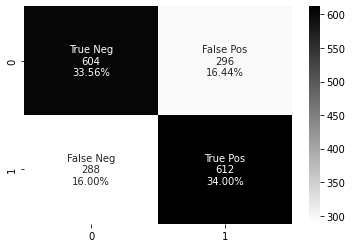

In [1]:
from timeit import default_timer as timer

start = timer()

import seaborn as sns
from time import perf_counter, sleep
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.model_selection import KFold
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.applications import VGG16, VGG19, Xception, ResNet152V2, MobileNetV2
from builtins import range, input
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model, load_model
from tensorflow import keras 
from tensorflow.keras import layers, models, optimizers

# Model configuration
batch_size = 32
no_classes = 2
no_epochs = 20
optimizer = SGD(learning_rate=0.0001)
verbosity = 1
num_folds = 5

#----------------------------------------------------------------------------------------
from PIL import Image
import glob

NEG = glob.glob('C:/Users/Wael Alhazmi/Desktop/Dataset/CT COLONOGRAPHY/Filters - NEG' + '/*.*')
POS = glob.glob('C:/Users/Wael Alhazmi/Desktop/Dataset/CT COLONOGRAPHY/Filters - POS' + '/*.*')


data = []
labels = []

for i in NEG:   
    image=tf.keras.preprocessing.image.load_img(i, 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(0)
for i in POS:   
    image=tf.keras.preprocessing.image.load_img(i, 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(1)


data = np.array(data)
labels = np.array(labels)

from sklearn.model_selection import train_test_split
input_train, input_test, target_train, target_test = train_test_split(data, labels, test_size=0.2, random_state=42)

#----------------------------------------------------------------------------------------




# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

# Define Train_per-fold score containers
Train_acc_per_fold = []
Train_pre_per_fold = []
Train_rec_per_fold = []
Train_AUC_per_fold = []
Train_Loss_per_fold = []


# Define per-fold score containers
acc_per_fold = []
ACC_per_fold = []
loss_per_fold = []
Precision_per_fold = []
Recall_per_fold = []
AUC_per_fold = []

TN = []
FN = []
TP = []
FP = []
TN_SUM = 0
FN_SUM = 0
TP_SUM = 0
FP_SUM = 0


# Merge inputs and targets
inputs = np.concatenate((input_train, input_test), axis=0)
targets = np.concatenate((target_train, target_test), axis=0)




# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

  # Define the model architecture


  def create_model():
      model = models.Sequential()
      model.add(Xception(include_top=False, weights='imagenet', input_shape=(224, 224, 3)))
      model.add(layers.GlobalAveragePooling2D())
      model.add(layers.Dense(1, activation='sigmoid'))
    
      return model


  model_2 = create_model()
  model_2.summary()
    
 
  # Compile the model
  model_2.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy','binary_crossentropy',tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall'),
                        tf.keras.metrics.AUC(name='auc')])
  

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model_2.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)

  print(f'Loss of Train ......................................')
  print(history.history['binary_crossentropy'])

  print(f'Accuracy of Train ......................................')
  print(history.history['accuracy'])

  print(f'Precision of Train ......................................')
  print(history.history['precision'])

  print(f'Recall of Train ......................................')
  print(history.history['recall'])

  print(f'AUC of Train ......................................')
  print(history.history['auc'])

  print(f'Train of epochs .................................')
    
  ACC_Train = (np.sum(history.history['accuracy'])/20)
  PRE_Train = (np.sum(history.history['precision'])/20)
  REC_Train = (np.sum(history.history['recall'])/20)
  AUC_Train = (np.sum(history.history['auc'])/20)
  Loss_Train = (np.sum(history.history['binary_crossentropy'])/20)
    
  print(f' Accuracy:{ACC_Train}')
  print(f' Loss:{Loss_Train}')
  print(f' Precision:{PRE_Train}')
  print(f' Recall:{REC_Train}')
  print(f' AUC:{AUC_Train}')
  






  # Generate generalization metrics
  scores = model_2.evaluate(inputs[test], targets[test], verbose=0)

  

    
  print(f'Score for fold {fold_no}: {model_2.metrics_names[0]} of {scores[0]}; {model_2.metrics_names[1]} of {scores[1]}%')
  acc_per_fold.append(scores[1])
  
  loss_per_fold.append(scores[0])
  
  
  import seaborn as sns
  y_pred = model_2.predict(inputs[test])
  y_pred = (y_pred > 0.5)

  #y_pred = model_2.predict(inputs[test])
  cm=confusion_matrix(targets[test],y_pred)
  print(cm)
    
  end = timer()
  print('------------------------------------------------------------------------')
  print(f'Time: {end - start} Second') # Time in seconds, e.g. 5.38091952400282
  print('------------------------------------------------------------------------')

    

  TN = cm[0][0]
  FN = cm[1][0]
  TP = cm[1][1]
  FP = cm[0][1]

  print(f' TN:{TN},FN:{FN},TP:{TP},FP:{FP}')
  TN_SUM += TN
  FN_SUM += FN
  TP_SUM += TP
  FP_SUM += FP

    
  Accuracy = (TP + TN) /(TP + TN + FP + FN)
  Precision = (TP) / (TP + FP)
  Recall = (TP) / (TP + FN)
  AUC = (0.5 * ( (TP / (TP + FN)) + (TN / (TN + FN)) ) )
    
    
  print(f'Test of epochs .................................')
  print(f' Accuracy:{Accuracy}')
  print(f' Loss:{scores[0]}')
  print(f' Precision:{Precision}')
  print(f' Recall:{Recall}')  
  print(f' AUC:{AUC}')


  ACC_per_fold.append(Accuracy)
  Precision_per_fold.append(Precision)
  Recall_per_fold.append(Recall)
  AUC_per_fold.append(AUC)
    
  Train_acc_per_fold.append(ACC_Train)
  Train_pre_per_fold.append(PRE_Train)
  Train_rec_per_fold.append(REC_Train)
  Train_AUC_per_fold.append(AUC_Train)
  Train_Loss_per_fold.append(Loss_Train)





  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    
  print('----------------------------------Train--------------------------------------')
  print(f'> Fold {i+1} - Accuracy: {Train_acc_per_fold[i]} - Loss: {Train_Loss_per_fold[i]}')
  print(f'> Fold {i+1} - Precision: {Train_pre_per_fold[i]}')  
  print(f'> Fold {i+1} - Recall: {Train_rec_per_fold[i]}')
  print(f'> Fold {i+1} - AUC: {Train_AUC_per_fold[i]}')
  print('----------------------------------Test---------------------------------------')
  print(f'> Fold {i+1} - Accuracy: {ACC_per_fold[i]} - Loss: {loss_per_fold[i]}')
  print(f'> Fold {i+1} - Precision: {Precision_per_fold[i]}')
  print(f'> Fold {i+1} - Recall: {Recall_per_fold[i]}')
  print(f'> Fold {i+1} - AUC: {AUC_per_fold[i]}')

    

print('----------------------------------Train--------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(Train_acc_per_fold)} (+- {np.std(Train_acc_per_fold)})')
print(f'> Loss: {np.mean(Train_Loss_per_fold)} (+- {np.std(Train_Loss_per_fold)})')
print(f'> Precision: {np.mean(Train_pre_per_fold)} (+- {np.std(Train_pre_per_fold)})')
print(f'> Recall: {np.mean(Train_rec_per_fold)} (+- {np.std(Train_rec_per_fold)})')
print(f'> AUC: {np.mean(Train_AUC_per_fold)} (+- {np.std(Train_AUC_per_fold)})')
print('----------------------------------Test---------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(ACC_per_fold)} (+- {np.std(ACC_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)} (+- {np.std(loss_per_fold)})')
print(f'> Precision: {np.mean(Precision_per_fold)} (+- {np.std(Precision_per_fold)})')
print(f'> Recall: {np.mean(Recall_per_fold)} (+- {np.std(Recall_per_fold)})')
print(f'> AUC: {np.mean(AUC_per_fold)} (+- {np.std(AUC_per_fold)})')




print('----------------------------------Combined Confusion Matrices--------------------------------------')
print(f'> TN SUM: {TN_SUM} FN SUM: {FN_SUM} TP SUM: {TP_SUM} FP SUM: {FP_SUM}')



# Your Confusion Matrix
cm2 = np.array([[TN_SUM, FP_SUM],
               [FN_SUM, TP_SUM]])

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm2.flatten()/np.sum(cm2)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm2, annot=labels, fmt='', cmap='binary')



# MobileNetV2

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 2,225,153
Non-trainable params: 34,112
_________________________________________________________________
------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/20
45/45 [==============================] - 13s 154ms/step - loss: 0

 dense_1 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 2,225,153
Non-trainable params: 34,112
_________________________________________________________________
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/20
45/45 [==============================] - 10s 159ms/step - loss: 0.7159 - accuracy: 0.5500 - binary_crossentropy: 0.7159 - precision: 0.6238 - recall: 0.2676 - auc: 0.5956
Epoch 2/20
45/45 [==============================] - 8s 171ms/step - loss: 0.6441 - accuracy: 0.6340 - binary_crossentropy: 0.6441 - precision: 0.7450 - recall: 0.4152 - auc: 0.7090
Epoch 3/20
45/45 [==============================] - 8s 180ms/step - loss: 0.5777 - accuracy: 0.6951 - binary_crossentropy: 0.5777 - precision: 0.7918 - recall: 0.5352 - auc: 0.8019
Epoch 4/20
45/45 [==============================] - 8s 175ms/step - loss: 0.5195

45/45 [==============================] - 8s 180ms/step - loss: 0.5502 - accuracy: 0.7236 - binary_crossentropy: 0.5502 - precision: 0.7520 - recall: 0.6592 - auc: 0.8225
Epoch 5/20
45/45 [==============================] - 8s 178ms/step - loss: 0.5092 - accuracy: 0.7931 - binary_crossentropy: 0.5092 - precision: 0.8197 - recall: 0.7461 - auc: 0.8761
Epoch 6/20
45/45 [==============================] - 8s 181ms/step - loss: 0.4738 - accuracy: 0.8368 - binary_crossentropy: 0.4738 - precision: 0.8654 - recall: 0.7938 - auc: 0.9098
Epoch 7/20
45/45 [==============================] - 8s 187ms/step - loss: 0.4419 - accuracy: 0.8576 - binary_crossentropy: 0.4419 - precision: 0.8746 - recall: 0.8317 - auc: 0.9355
Epoch 8/20
45/45 [==============================] - 8s 177ms/step - loss: 0.4171 - accuracy: 0.8757 - binary_crossentropy: 0.4171 - precision: 0.8870 - recall: 0.8583 - auc: 0.9467
Epoch 9/20
45/45 [==============================] - 8s 175ms/step - loss: 0.3921 - accuracy: 0.8910 - bina

<AxesSubplot:>

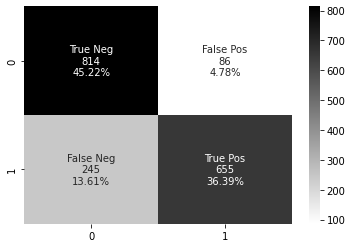

In [1]:
from timeit import default_timer as timer

start = timer()

import seaborn as sns
from time import perf_counter, sleep
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.model_selection import KFold
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.applications import VGG16, VGG19, Xception, ResNet152V2, MobileNetV2
from builtins import range, input
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model, load_model
from tensorflow import keras 
from tensorflow.keras import layers, models, optimizers

# Model configuration
batch_size = 32
no_classes = 2
no_epochs = 20
optimizer = SGD(learning_rate=0.0001)
verbosity = 1
num_folds = 5

#----------------------------------------------------------------------------------------
from PIL import Image
import glob

NEG = glob.glob('C:/Users/Wael Alhazmi/Desktop/Dataset/CT COLONOGRAPHY/Filters - NEG' + '/*.*')
POS = glob.glob('C:/Users/Wael Alhazmi/Desktop/Dataset/CT COLONOGRAPHY/Filters - POS' + '/*.*')


data = []
labels = []

for i in NEG:   
    image=tf.keras.preprocessing.image.load_img(i, 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(0)
for i in POS:   
    image=tf.keras.preprocessing.image.load_img(i, 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(1)


data = np.array(data)
labels = np.array(labels)

from sklearn.model_selection import train_test_split
input_train, input_test, target_train, target_test = train_test_split(data, labels, test_size=0.2, random_state=42)

#----------------------------------------------------------------------------------------




# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

# Define Train_per-fold score containers
Train_acc_per_fold = []
Train_pre_per_fold = []
Train_rec_per_fold = []
Train_AUC_per_fold = []
Train_Loss_per_fold = []


# Define per-fold score containers
acc_per_fold = []
ACC_per_fold = []
loss_per_fold = []
Precision_per_fold = []
Recall_per_fold = []
AUC_per_fold = []

TN = []
FN = []
TP = []
FP = []
TN_SUM = 0
FN_SUM = 0
TP_SUM = 0
FP_SUM = 0


# Merge inputs and targets
inputs = np.concatenate((input_train, input_test), axis=0)
targets = np.concatenate((target_train, target_test), axis=0)




# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

  # Define the model architecture


  def create_model():
      model = models.Sequential()
      model.add(MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3)))
      model.add(layers.GlobalAveragePooling2D())
      model.add(layers.Dense(1, activation='sigmoid'))
    
      return model


  model_2 = create_model()
  model_2.summary()
    
 
  # Compile the model
  model_2.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy','binary_crossentropy',tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall'),
                        tf.keras.metrics.AUC(name='auc')])
  

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model_2.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)

  print(f'Loss of Train ......................................')
  print(history.history['binary_crossentropy'])

  print(f'Accuracy of Train ......................................')
  print(history.history['accuracy'])

  print(f'Precision of Train ......................................')
  print(history.history['precision'])

  print(f'Recall of Train ......................................')
  print(history.history['recall'])

  print(f'AUC of Train ......................................')
  print(history.history['auc'])

  print(f'Train of epochs .................................')
    
  ACC_Train = (np.sum(history.history['accuracy'])/20)
  PRE_Train = (np.sum(history.history['precision'])/20)
  REC_Train = (np.sum(history.history['recall'])/20)
  AUC_Train = (np.sum(history.history['auc'])/20)
  Loss_Train = (np.sum(history.history['binary_crossentropy'])/20)
    
  print(f' Accuracy:{ACC_Train}')
  print(f' Loss:{Loss_Train}')
  print(f' Precision:{PRE_Train}')
  print(f' Recall:{REC_Train}')
  print(f' AUC:{AUC_Train}')
  






  # Generate generalization metrics
  scores = model_2.evaluate(inputs[test], targets[test], verbose=0)

  

    
  print(f'Score for fold {fold_no}: {model_2.metrics_names[0]} of {scores[0]}; {model_2.metrics_names[1]} of {scores[1]}%')
  acc_per_fold.append(scores[1])
  
  loss_per_fold.append(scores[0])
  
  
  import seaborn as sns
  y_pred = model_2.predict(inputs[test])
  y_pred = (y_pred > 0.5)

  #y_pred = model_2.predict(inputs[test])
  cm=confusion_matrix(targets[test],y_pred)
  print(cm)
    
  end = timer()
  print('------------------------------------------------------------------------')
  print(f'Time: {end - start} Second') # Time in seconds, e.g. 5.38091952400282
  print('------------------------------------------------------------------------')

    

  TN = cm[0][0]
  FN = cm[1][0]
  TP = cm[1][1]
  FP = cm[0][1]

  print(f' TN:{TN},FN:{FN},TP:{TP},FP:{FP}')
  TN_SUM += TN
  FN_SUM += FN
  TP_SUM += TP
  FP_SUM += FP

    
  Accuracy = (TP + TN) /(TP + TN + FP + FN)
  Precision = (TP) / (TP + FP)
  Recall = (TP) / (TP + FN)
  AUC = (0.5 * ( (TP / (TP + FN)) + (TN / (TN + FN)) ) )
    
    
  print(f'Test of epochs .................................')
  print(f' Accuracy:{Accuracy}')
  print(f' Loss:{scores[0]}')
  print(f' Precision:{Precision}')
  print(f' Recall:{Recall}')  
  print(f' AUC:{AUC}')


  ACC_per_fold.append(Accuracy)
  Precision_per_fold.append(Precision)
  Recall_per_fold.append(Recall)
  AUC_per_fold.append(AUC)
    
  Train_acc_per_fold.append(ACC_Train)
  Train_pre_per_fold.append(PRE_Train)
  Train_rec_per_fold.append(REC_Train)
  Train_AUC_per_fold.append(AUC_Train)
  Train_Loss_per_fold.append(Loss_Train)





  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    
  print('----------------------------------Train--------------------------------------')
  print(f'> Fold {i+1} - Accuracy: {Train_acc_per_fold[i]} - Loss: {Train_Loss_per_fold[i]}')
  print(f'> Fold {i+1} - Precision: {Train_pre_per_fold[i]}')  
  print(f'> Fold {i+1} - Recall: {Train_rec_per_fold[i]}')
  print(f'> Fold {i+1} - AUC: {Train_AUC_per_fold[i]}')
  print('----------------------------------Test---------------------------------------')
  print(f'> Fold {i+1} - Accuracy: {ACC_per_fold[i]} - Loss: {loss_per_fold[i]}')
  print(f'> Fold {i+1} - Precision: {Precision_per_fold[i]}')
  print(f'> Fold {i+1} - Recall: {Recall_per_fold[i]}')
  print(f'> Fold {i+1} - AUC: {AUC_per_fold[i]}')

    

print('----------------------------------Train--------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(Train_acc_per_fold)} (+- {np.std(Train_acc_per_fold)})')
print(f'> Loss: {np.mean(Train_Loss_per_fold)} (+- {np.std(Train_Loss_per_fold)})')
print(f'> Precision: {np.mean(Train_pre_per_fold)} (+- {np.std(Train_pre_per_fold)})')
print(f'> Recall: {np.mean(Train_rec_per_fold)} (+- {np.std(Train_rec_per_fold)})')
print(f'> AUC: {np.mean(Train_AUC_per_fold)} (+- {np.std(Train_AUC_per_fold)})')
print('----------------------------------Test---------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(ACC_per_fold)} (+- {np.std(ACC_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)} (+- {np.std(loss_per_fold)})')
print(f'> Precision: {np.mean(Precision_per_fold)} (+- {np.std(Precision_per_fold)})')
print(f'> Recall: {np.mean(Recall_per_fold)} (+- {np.std(Recall_per_fold)})')
print(f'> AUC: {np.mean(AUC_per_fold)} (+- {np.std(AUC_per_fold)})')




print('----------------------------------Combined Confusion Matrices--------------------------------------')
print(f'> TN SUM: {TN_SUM} FN SUM: {FN_SUM} TP SUM: {TP_SUM} FP SUM: {FP_SUM}')



# Your Confusion Matrix
cm2 = np.array([[TN_SUM, FP_SUM],
               [FN_SUM, TP_SUM]])

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm2.flatten()/np.sum(cm2)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm2, annot=labels, fmt='', cmap='binary')



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 global_average_pooling2d (G  (None, 1920)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1)                 1921      
                                                                 
Total params: 18,323,905
Trainable params: 18,094,849
Non-trainable params: 229,056
_________________________________________________________________
------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/20
45/45 [==============================] - 44s 362ms/step - loss: 0.7540 - accuracy: 0.5292 - binary_crossentropy: 0.7540 - precis

Total params: 18,323,905
Trainable params: 18,094,849
Non-trainable params: 229,056
_________________________________________________________________
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/20
45/45 [==============================] - 34s 370ms/step - loss: 0.7571 - accuracy: 0.4847 - binary_crossentropy: 0.7571 - precision: 0.4505 - recall: 0.1389 - auc: 0.4759
Epoch 2/20
45/45 [==============================] - 18s 396ms/step - loss: 0.6558 - accuracy: 0.5764 - binary_crossentropy: 0.6558 - precision: 0.6403 - recall: 0.3486 - auc: 0.6830
Epoch 3/20
45/45 [==============================] - 19s 420ms/step - loss: 0.5755 - accuracy: 0.7215 - binary_crossentropy: 0.5755 - precision: 0.7884 - recall: 0.6056 - auc: 0.8318
Epoch 4/20
45/45 [==============================] - 19s 421ms/step - loss: 0.5209 - accuracy: 0.8299 - binary_crossentropy: 0.5209 - precision: 0.8648 - recall: 0.7819 - auc: 0.9041
Epoch 5/20
45/45 [=======

45/45 [==============================] - 18s 393ms/step - loss: 0.6135 - accuracy: 0.6778 - binary_crossentropy: 0.6135 - precision: 0.7103 - recall: 0.5819 - auc: 0.7476
Epoch 3/20
45/45 [==============================] - 19s 420ms/step - loss: 0.5485 - accuracy: 0.7778 - binary_crossentropy: 0.5485 - precision: 0.8003 - recall: 0.7302 - auc: 0.8581
Epoch 4/20
45/45 [==============================] - 19s 419ms/step - loss: 0.4942 - accuracy: 0.8389 - binary_crossentropy: 0.4942 - precision: 0.8439 - recall: 0.8249 - auc: 0.9226
Epoch 5/20
45/45 [==============================] - 19s 418ms/step - loss: 0.4495 - accuracy: 0.8944 - binary_crossentropy: 0.4495 - precision: 0.9017 - recall: 0.8814 - auc: 0.9584
Epoch 6/20
45/45 [==============================] - 18s 405ms/step - loss: 0.4072 - accuracy: 0.9215 - binary_crossentropy: 0.4072 - precision: 0.9161 - recall: 0.9251 - auc: 0.9777
Epoch 7/20
45/45 [==============================] - 19s 413ms/step - loss: 0.3739 - accuracy: 0.9417 

45/45 [==============================] - 19s 421ms/step - loss: 0.4394 - accuracy: 0.8750 - binary_crossentropy: 0.4394 - precision: 0.8769 - recall: 0.8769 - auc: 0.9517
Epoch 6/20
45/45 [==============================] - 19s 423ms/step - loss: 0.4016 - accuracy: 0.9069 - binary_crossentropy: 0.4016 - precision: 0.9028 - recall: 0.9152 - auc: 0.9705
Epoch 7/20
45/45 [==============================] - 19s 422ms/step - loss: 0.3699 - accuracy: 0.9340 - binary_crossentropy: 0.3699 - precision: 0.9332 - recall: 0.9371 - auc: 0.9784
Epoch 8/20
45/45 [==============================] - 19s 422ms/step - loss: 0.3495 - accuracy: 0.9285 - binary_crossentropy: 0.3495 - precision: 0.9232 - recall: 0.9371 - auc: 0.9821
Epoch 9/20
45/45 [==============================] - 19s 422ms/step - loss: 0.3188 - accuracy: 0.9500 - binary_crossentropy: 0.3188 - precision: 0.9459 - recall: 0.9562 - auc: 0.9896
Epoch 10/20
45/45 [==============================] - 19s 423ms/step - loss: 0.2987 - accuracy: 0.9597

45/45 [==============================] - 19s 422ms/step - loss: 0.3642 - accuracy: 0.9549 - binary_crossentropy: 0.3642 - precision: 0.9477 - recall: 0.9623 - auc: 0.9918
Epoch 9/20
45/45 [==============================] - 19s 423ms/step - loss: 0.3414 - accuracy: 0.9597 - binary_crossentropy: 0.3414 - precision: 0.9507 - recall: 0.9693 - auc: 0.9939
Epoch 10/20
45/45 [==============================] - 19s 423ms/step - loss: 0.3170 - accuracy: 0.9701 - binary_crossentropy: 0.3170 - precision: 0.9706 - recall: 0.9693 - auc: 0.9967
Epoch 11/20
45/45 [==============================] - 19s 423ms/step - loss: 0.2943 - accuracy: 0.9757 - binary_crossentropy: 0.2943 - precision: 0.9684 - recall: 0.9832 - auc: 0.9980
Epoch 12/20
45/45 [==============================] - 19s 426ms/step - loss: 0.2814 - accuracy: 0.9799 - binary_crossentropy: 0.2814 - precision: 0.9661 - recall: 0.9944 - auc: 0.9982
Epoch 13/20
45/45 [==============================] - 19s 424ms/step - loss: 0.2730 - accuracy: 0.9

<AxesSubplot:>

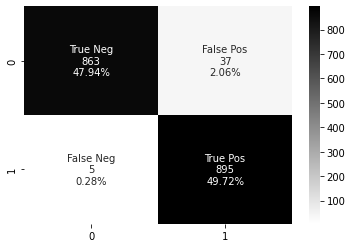

In [1]:
from timeit import default_timer as timer

start = timer()

import seaborn as sns
from time import perf_counter, sleep
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.model_selection import KFold
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.applications import VGG16, VGG19, Xception, ResNet152V2, MobileNetV2, DenseNet201
from builtins import range, input
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model, load_model
from tensorflow import keras 
from tensorflow.keras import layers, models, optimizers

# Model configuration
batch_size = 32
no_classes = 2
no_epochs = 20
optimizer = SGD(learning_rate=0.0001)
verbosity = 1
num_folds = 5

#----------------------------------------------------------------------------------------
from PIL import Image
import glob

NEG = glob.glob('C:/Users/Wael Alhazmi/Desktop/Dataset/CT COLONOGRAPHY/Filters - NEG' + '/*.*')
POS = glob.glob('C:/Users/Wael Alhazmi/Desktop/Dataset/CT COLONOGRAPHY/Filters - POS' + '/*.*')


data = []
labels = []

for i in NEG:   
    image=tf.keras.preprocessing.image.load_img(i, 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(0)
for i in POS:   
    image=tf.keras.preprocessing.image.load_img(i, 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(1)


data = np.array(data)
labels = np.array(labels)

from sklearn.model_selection import train_test_split
input_train, input_test, target_train, target_test = train_test_split(data, labels, test_size=0.2, random_state=42)

#----------------------------------------------------------------------------------------




# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

# Define Train_per-fold score containers
Train_acc_per_fold = []
Train_pre_per_fold = []
Train_rec_per_fold = []
Train_AUC_per_fold = []
Train_Loss_per_fold = []


# Define per-fold score containers
acc_per_fold = []
ACC_per_fold = []
loss_per_fold = []
Precision_per_fold = []
Recall_per_fold = []
AUC_per_fold = []

TN = []
FN = []
TP = []
FP = []
TN_SUM = 0
FN_SUM = 0
TP_SUM = 0
FP_SUM = 0


# Merge inputs and targets
inputs = np.concatenate((input_train, input_test), axis=0)
targets = np.concatenate((target_train, target_test), axis=0)




# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

  # Define the model architecture


  def create_model():
      model = models.Sequential()
      model.add(DenseNet201(include_top=False, weights='imagenet', input_shape=(224, 224, 3)))
      model.add(layers.GlobalAveragePooling2D())
      model.add(layers.Dense(1, activation='sigmoid'))
    
      return model


  model_2 = create_model()
  model_2.summary()
    
 
  # Compile the model
  model_2.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy','binary_crossentropy',tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall'),
                        tf.keras.metrics.AUC(name='auc')])
  

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model_2.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)

  print(f'Loss of Train ......................................')
  print(history.history['binary_crossentropy'])

  print(f'Accuracy of Train ......................................')
  print(history.history['accuracy'])

  print(f'Precision of Train ......................................')
  print(history.history['precision'])

  print(f'Recall of Train ......................................')
  print(history.history['recall'])

  print(f'AUC of Train ......................................')
  print(history.history['auc'])

  print(f'Train of epochs .................................')
    
  ACC_Train = (np.sum(history.history['accuracy'])/20)
  PRE_Train = (np.sum(history.history['precision'])/20)
  REC_Train = (np.sum(history.history['recall'])/20)
  AUC_Train = (np.sum(history.history['auc'])/20)
  Loss_Train = (np.sum(history.history['binary_crossentropy'])/20)
    
  print(f' Accuracy:{ACC_Train}')
  print(f' Loss:{Loss_Train}')
  print(f' Precision:{PRE_Train}')
  print(f' Recall:{REC_Train}')
  print(f' AUC:{AUC_Train}')
  






  # Generate generalization metrics
  scores = model_2.evaluate(inputs[test], targets[test], verbose=0)

  

    
  print(f'Score for fold {fold_no}: {model_2.metrics_names[0]} of {scores[0]}; {model_2.metrics_names[1]} of {scores[1]}%')
  acc_per_fold.append(scores[1])
  
  loss_per_fold.append(scores[0])
  
  
  import seaborn as sns
  y_pred = model_2.predict(inputs[test])
  y_pred = (y_pred > 0.5)

  #y_pred = model_2.predict(inputs[test])
  cm=confusion_matrix(targets[test],y_pred)
  print(cm)
    
  end = timer()
  print('------------------------------------------------------------------------')
  print(f'Time: {end - start} Second') # Time in seconds, e.g. 5.38091952400282
  print('------------------------------------------------------------------------')

    

  TN = cm[0][0]
  FN = cm[1][0]
  TP = cm[1][1]
  FP = cm[0][1]

  print(f' TN:{TN},FN:{FN},TP:{TP},FP:{FP}')
  TN_SUM += TN
  FN_SUM += FN
  TP_SUM += TP
  FP_SUM += FP

    
  Accuracy = (TP + TN) /(TP + TN + FP + FN)
  Precision = (TP) / (TP + FP)
  Recall = (TP) / (TP + FN)
  AUC = (0.5 * ( (TP / (TP + FN)) + (TN / (TN + FN)) ) )
    
    
  print(f'Test of epochs .................................')
  print(f' Accuracy:{Accuracy}')
  print(f' Loss:{scores[0]}')
  print(f' Precision:{Precision}')
  print(f' Recall:{Recall}')  
  print(f' AUC:{AUC}')


  ACC_per_fold.append(Accuracy)
  Precision_per_fold.append(Precision)
  Recall_per_fold.append(Recall)
  AUC_per_fold.append(AUC)
    
  Train_acc_per_fold.append(ACC_Train)
  Train_pre_per_fold.append(PRE_Train)
  Train_rec_per_fold.append(REC_Train)
  Train_AUC_per_fold.append(AUC_Train)
  Train_Loss_per_fold.append(Loss_Train)





  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    
  print('----------------------------------Train--------------------------------------')
  print(f'> Fold {i+1} - Accuracy: {Train_acc_per_fold[i]} - Loss: {Train_Loss_per_fold[i]}')
  print(f'> Fold {i+1} - Precision: {Train_pre_per_fold[i]}')  
  print(f'> Fold {i+1} - Recall: {Train_rec_per_fold[i]}')
  print(f'> Fold {i+1} - AUC: {Train_AUC_per_fold[i]}')
  print('----------------------------------Test---------------------------------------')
  print(f'> Fold {i+1} - Accuracy: {ACC_per_fold[i]} - Loss: {loss_per_fold[i]}')
  print(f'> Fold {i+1} - Precision: {Precision_per_fold[i]}')
  print(f'> Fold {i+1} - Recall: {Recall_per_fold[i]}')
  print(f'> Fold {i+1} - AUC: {AUC_per_fold[i]}')

    

print('----------------------------------Train--------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(Train_acc_per_fold)} (+- {np.std(Train_acc_per_fold)})')
print(f'> Loss: {np.mean(Train_Loss_per_fold)} (+- {np.std(Train_Loss_per_fold)})')
print(f'> Precision: {np.mean(Train_pre_per_fold)} (+- {np.std(Train_pre_per_fold)})')
print(f'> Recall: {np.mean(Train_rec_per_fold)} (+- {np.std(Train_rec_per_fold)})')
print(f'> AUC: {np.mean(Train_AUC_per_fold)} (+- {np.std(Train_AUC_per_fold)})')
print('----------------------------------Test---------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(ACC_per_fold)} (+- {np.std(ACC_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)} (+- {np.std(loss_per_fold)})')
print(f'> Precision: {np.mean(Precision_per_fold)} (+- {np.std(Precision_per_fold)})')
print(f'> Recall: {np.mean(Recall_per_fold)} (+- {np.std(Recall_per_fold)})')
print(f'> AUC: {np.mean(AUC_per_fold)} (+- {np.std(AUC_per_fold)})')




print('----------------------------------Combined Confusion Matrices--------------------------------------')
print(f'> TN SUM: {TN_SUM} FN SUM: {FN_SUM} TP SUM: {TP_SUM} FP SUM: {FP_SUM}')



# Your Confusion Matrix
cm2 = np.array([[TN_SUM, FP_SUM],
               [FN_SUM, TP_SUM]])

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm2.flatten()/np.sum(cm2)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm2, annot=labels, fmt='', cmap='binary')

